In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv('datasets/NewYork/listings_with_IncEduCri_NYC_2.csv')
df = df.dropna(how = 'any')
df.head()

,id,price,Zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,minimum_nights,maximum_nights,host_total_listings_count,availability_365,number_of_reviews,number_of_reviews_ltm,reviews_per_month,income,education,crime
0,15396.0,375.0,10001,40.74623,-73.99530,Apartment,Entire home/apt,4.0,2.0,2.0,...,180.0,365.0,2.0,180.0,5.0,0.0,0.11,77512.0,0.914931,2846
1,37042.0,150.0,10001,40.75295,-73.99801,Apartment,Entire home/apt,4.0,1.0,2.0,...,10.0,21.0,1.0,0.0,25.0,0.0,0.21,77512.0,0.914931,2846
2,51572.0,123.0,10001,40.74859,-73.99671,Apartment,Private room,2.0,1.0,1.0,...,1.0,8.0,1.0,82.0,395.0,35.0,3.47,77512.0,0.914931,2846
3,98663.0,130.0,10001,40.74893,-73.99544,Apartment,Entire home/apt,2.0,1.0,1.0,...,30.0,60.0,1.0,226.0,19.0,0.0,0.18,77512.0,0.914931,2846
4,110739.0,149.0,10001,40.74503,-73.98876,Loft,Entire home/apt,2.0,1.0,0.0,...,30.0,732.0,7.0,125.0,58.0,6.0,0.57,77512.0,0.914931,2846


In [2]:
df_count = df._get_numeric_data()
dummy_var = pd.get_dummies(df[['property_type','room_type']])
df_num_n = pd.concat([df_count, dummy_var], axis=1)

In [3]:
bins = [0, 69, 175, 10000]
group_names = ['Low', 'Medium', 'High']
df_num_n['price_binned'] = pd.cut(df_num_n['price'], bins, labels = group_names, include_lowest = True)
df_num_n.head()

,id,price,Zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,price_binned
0,15396.0,375.0,10001,40.74623,-73.99530,4.0,2.0,2.0,2.0,180.0,...,0,0,0,0,0,1,0,0,0,High
1,37042.0,150.0,10001,40.75295,-73.99801,4.0,1.0,2.0,2.0,10.0,...,0,0,0,0,0,1,0,0,0,Medium
2,51572.0,123.0,10001,40.74859,-73.99671,2.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,Medium
3,98663.0,130.0,10001,40.74893,-73.99544,2.0,1.0,1.0,1.0,30.0,...,0,0,0,0,0,1,0,0,0,Medium
4,110739.0,149.0,10001,40.74503,-73.98876,2.0,1.0,0.0,2.0,30.0,...,0,0,0,0,0,1,0,0,0,Medium


In [4]:
df_c = df_num_n.copy()
df_c.pop('price')
y = df_c.pop('price_binned')
df_c.iloc[:,4:].head()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,host_total_listings_count,availability_365,number_of_reviews,number_of_reviews_ltm,...,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,4.0,2.0,2.0,2.0,180.0,365.0,2.0,180.0,5.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,4.0,1.0,2.0,2.0,10.0,21.0,1.0,0.0,25.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,2.0,1.0,1.0,1.0,1.0,8.0,1.0,82.0,395.0,35.0,...,0,0,0,0,0,0,0,0,1,0
3,2.0,1.0,1.0,1.0,30.0,60.0,1.0,226.0,19.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1.0,0.0,2.0,30.0,732.0,7.0,125.0,58.0,6.0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_c.iloc[:,4:], y, test_size=0.2, random_state=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns= X_test.columns)

In [7]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
rfc = RandomForestClassifier(n_estimators = 100,
                            n_jobs = -1,
                            max_features = "auto",
                            random_state = 888,
                            min_samples_leaf=1)
rfc.fit(X_train_scaled,y_train)
yhat = rfc.predict(X_test_scaled)
print(metrics.accuracy_score(y_test, yhat))

0.5996961640714015


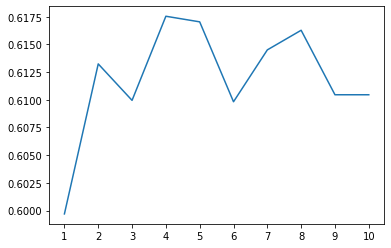

In [8]:
#tune the model
results = []
for sam in range(1,11):
    rfc = RandomForestClassifier(n_estimators = 100,
                            n_jobs = -1,
                            max_features = "auto",
                            random_state = 888,
                            min_samples_leaf=sam)
    rfc.fit(X_train_scaled,y_train)
    yhat = rfc.predict(X_test_scaled)
    results.append(metrics.accuracy_score(y_test, yhat))
plt.plot(results)
plt.xticks(np.arange(len(results)), np.arange(1,11))
plt.show()

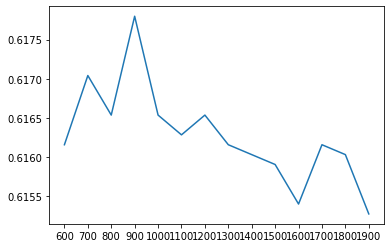

In [9]:
results = []
for tr in range(600,2000,100):
    rfc = RandomForestClassifier(n_estimators = tr,
                            n_jobs = -1,
                            max_features = "auto",
                            random_state = 888,
                            min_samples_leaf=4)
    rfc.fit(X_train_scaled,y_train)
    yhat = rfc.predict(X_test_scaled)
    results.append(metrics.accuracy_score(y_test, yhat))
plt.plot(results)
plt.xticks(np.arange(len(results)), np.arange(600,2000,100))
plt.show()

In [10]:
rfc = RandomForestClassifier(n_estimators = 900,
                            n_jobs = -1,
                            max_features = 0.2,
                            random_state = 888,
                            min_samples_leaf=4)
rfc.fit(X_train_scaled,y_train)
yhat = rfc.predict(X_test_scaled)
print('The accuracy of the model I managed to build is %s' % round(metrics.accuracy_score(y_test, yhat),2))

The accuracy of the model I managed to build is 0.62


In [11]:
len(X_train.columns)

54

Text(0, 0.5, 'Normalized Gini Importance')

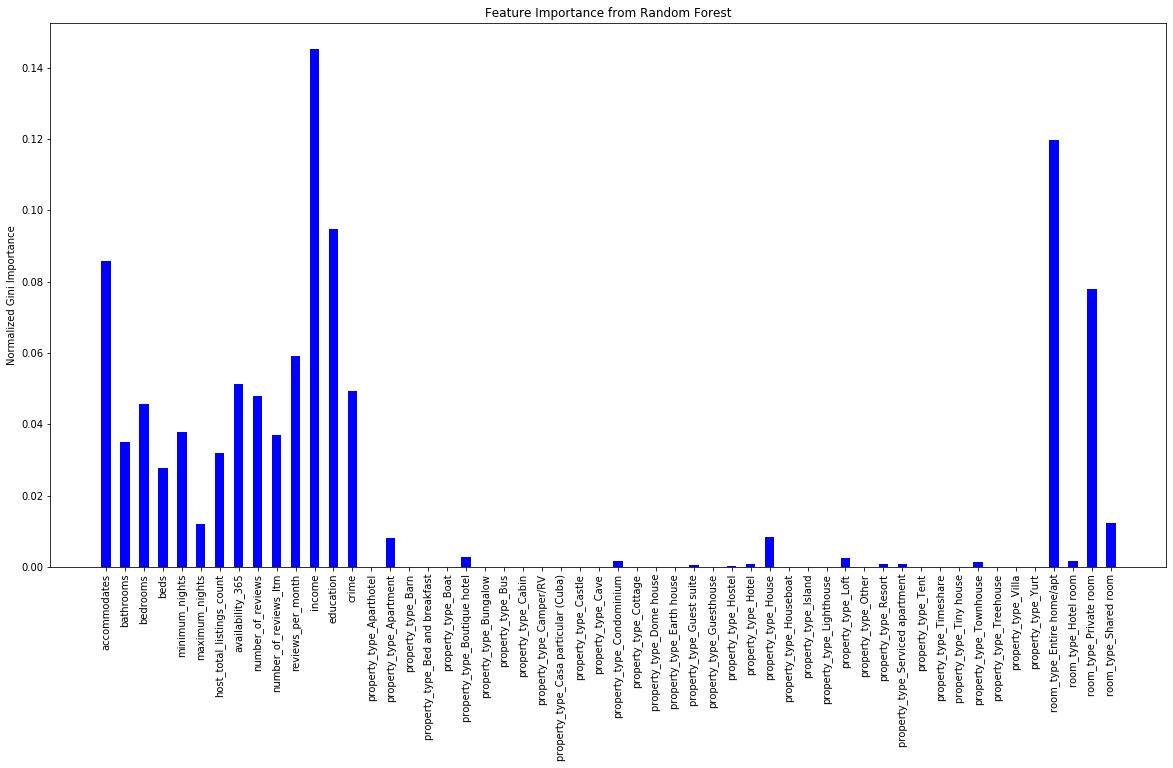

In [12]:
fig, ax = plt.subplots(figsize = (20,10))

ax.bar(np.arange(54), rfc.feature_importances_, width = 0.5, color = 'b')
ax.set_xticks(np.arange(len(rfc.feature_importances_)))
ax.set_xticklabels(X_train.columns.values, rotation = 90)
plt.title('Feature Importance from Random Forest')
ax.set_ylabel('Normalized Gini Importance')

In [13]:
rf_feature_importance = pd.DataFrame(np.array([X_train.columns,rfc.feature_importances_]).T,\
                                  columns=['Features','Importance'])
rf_selected_fi = rf_feature_importance.sort_values(by='Importance',ascending=False)
rf_selected_fi.reset_index(drop = True)[:10]

,Features,Importance
0,income,0.145244
1,room_type_Entire home/apt,0.119832
2,education,0.094896
3,accommodates,0.0858497
4,room_type_Private room,0.0780165
5,reviews_per_month,0.0591295
6,availability_365,0.0511462
7,crime,0.0492729
8,number_of_reviews,0.047792
9,bedrooms,0.0458016
